In [1]:
options(repr.plot.width=10, repr.plot.height=5)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
crimeData <- read.csv('../data/raw/Police_Stop_Data.csv', stringsAsFactors=FALSE)
head(crimeData)
dim(crimeData)
colSums(is.na(crimeData))

OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1001,16-406479,2016-11-09T17:43:21.000Z,,Attempt Pick-Up (P),BKG-Booking,,YES,NO,Native American,Native American,Male,44.94955,-93.28135,-10384032,5613583,5,Whittier,2017-08-08T10:24:35.000Z
1002,16-406495,2016-11-09T17:58:28.000Z,,Suspicious Vehicle (P),ADV-Advised,,NO,NO,Unknown,Black,Male,45.01416,-93.30824,-10387026,5623750,4,Cleveland,2017-08-08T10:24:35.000Z
1003,16-406507,2016-11-09T18:04:48.000Z,,Suspicious Vehicle (P),GOA-Gone on Arrival,,,,,,,44.99521,-93.29942,-10386044,5620767,4,Near - North,2017-08-08T10:25:31.000Z
1004,16-406526,2016-11-09T18:20:12.000Z,,Traffic Law Enforcement (P),,,,,,,,44.98247,-93.24400,-10379875,5618762,2,Marcy Holmes,2017-08-08T10:25:31.000Z
1005,16-406555,2016-11-09T18:40:01.000Z,,Suspicious Vehicle (P),AOK- All OK,,NO,NO,Unknown,Unknown,Unknown,44.91172,-93.21645,-10376808,5607634,3,Minnehaha,2017-08-08T10:25:03.000Z
1006,16-406556,2016-11-09T18:40:44.000Z,,Suspicious Person (P),GOA-Gone on Arrival,,NO,NO,Black,Unknown,Male,44.97609,-93.27744,-10383597,5617758,1,Downtown West,2017-08-08T10:25:03.000Z


[1] 132341     19

OBJECTID masterIncidentNumber         responseDate 
                   0                    0                    0 
              reason              problem      callDisposition 
                   0                    0                    0 
      citationIssued         personSearch        vehicleSearch 
                   0                    0                    0 
             preRace                 race               gender 
                   0                    0                    0 
                 lat                 long                    x 
                   0                    0                    0 
                   y       policePrecinct         neighborhood 
                   0                 1306                    0 
      lastUpdateDate 
                   0

Both OBJECTID and masterIncidentNumber are primary keys.

In [4]:
length(unique(crimeData$OBJECTID)) == nrow(crimeData)
length(unique(crimeData$masterIncidentNumber)) == nrow(crimeData)

[1] TRUE

[1] TRUE

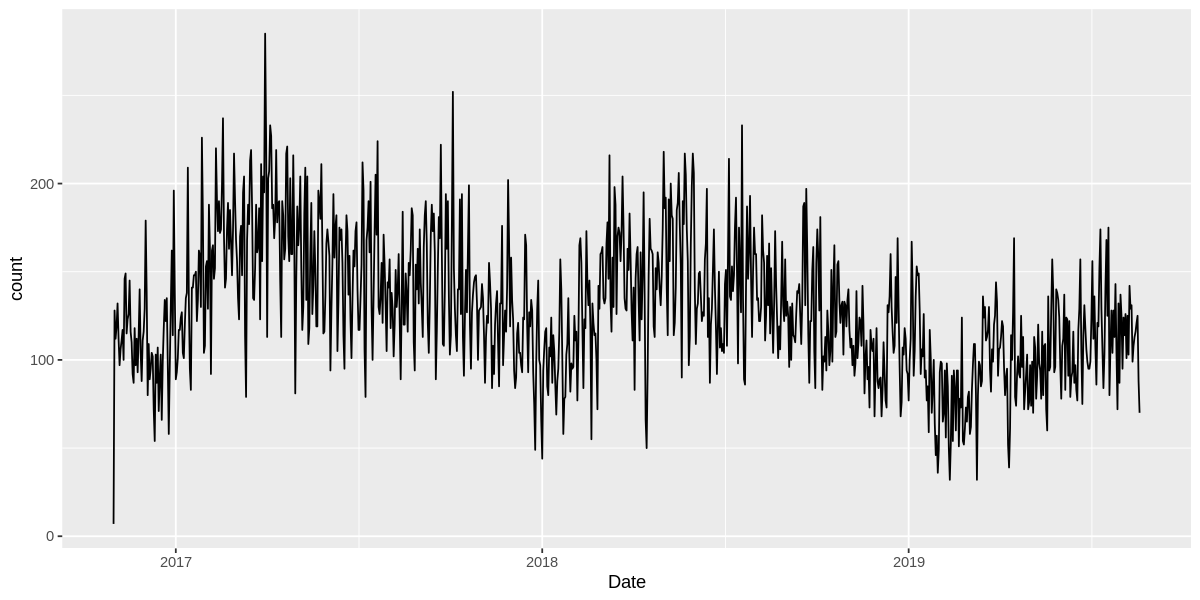

In [5]:
crimeData %>% 
    mutate(Date = as.Date(responseDate)) %>% 
ggplot() +
    geom_line(aes(Date), stat='count')

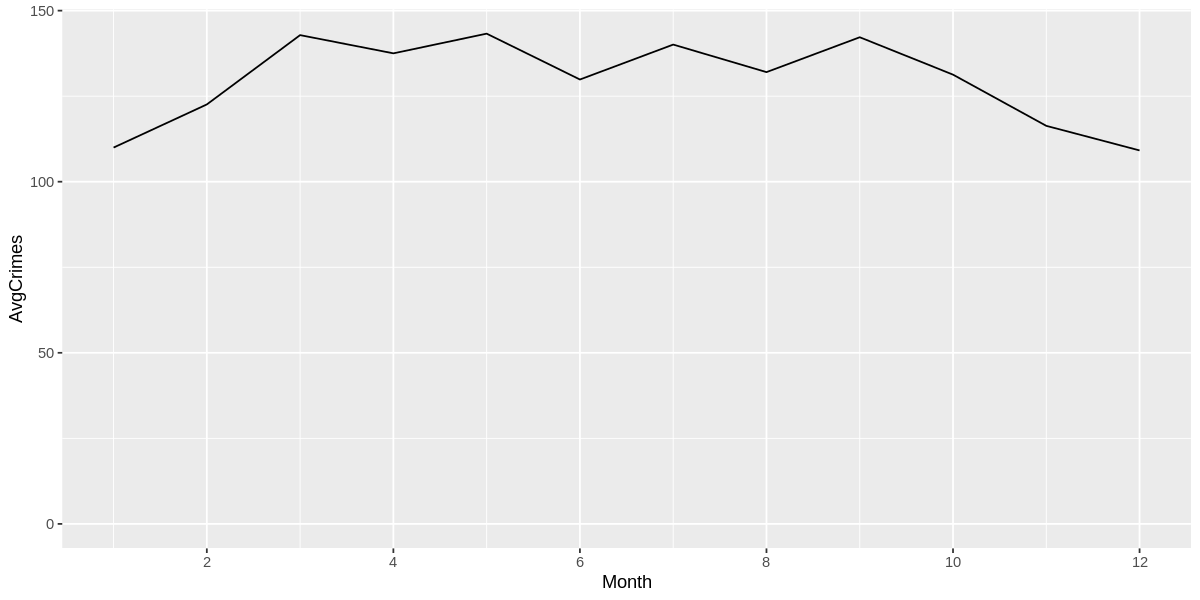

In [6]:
getMonth <- function(x) {
    as.numeric(str_sub(x, 6, 7))
}

getYear <- function(x) {
    as.numeric(str_sub(x, 1, 4))
}

crimeData %>% 
    mutate(
        Date = as.Date(responseDate),
        Month = getMonth(Date),
        Year = getYear(Date)
    ) %>% 
    group_by(Date, Month) %>% 
    summarise(
        Crimes=n()
    ) %>% 
    group_by(Month) %>% 
    summarise(
        AvgCrimes = mean(Crimes)
    ) %>% 
ggplot() +
    geom_line(aes(Month, AvgCrimes)) +
    scale_x_continuous(limits=c(1, 12), breaks=seq(0, 12, 2)) +
    expand_limits(y=0)

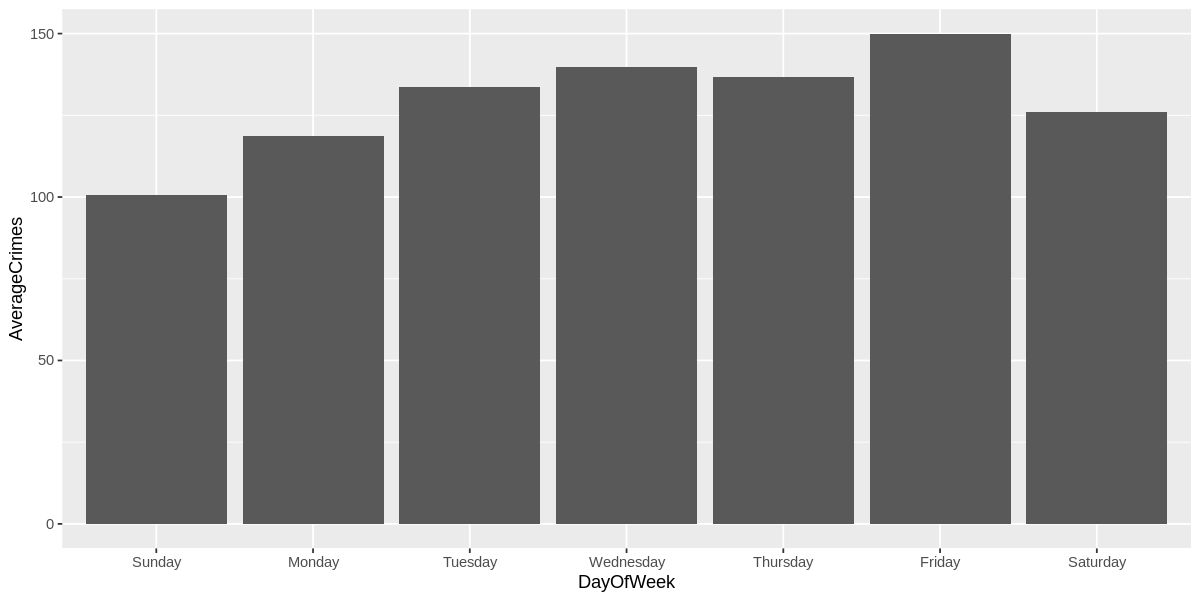

In [7]:
crimeData %>% 
    mutate(
        Date = as.Date(responseDate),
        DayOfWeek = factor(weekdays(Date), levels=c('Sunday', 'Monday', 'Tuesday', 'Wednesday',
                                                                    'Thursday', 'Friday', 'Saturday'))
    ) %>% 
    group_by(Date, DayOfWeek) %>% 
    summarise(
        CrimeCount = n()
    ) %>% 
    group_by(DayOfWeek) %>% 
    summarise(AverageCrimes = mean(CrimeCount)) %>% 
ggplot() +
    geom_bar(aes(DayOfWeek, AverageCrimes), stat='identity')

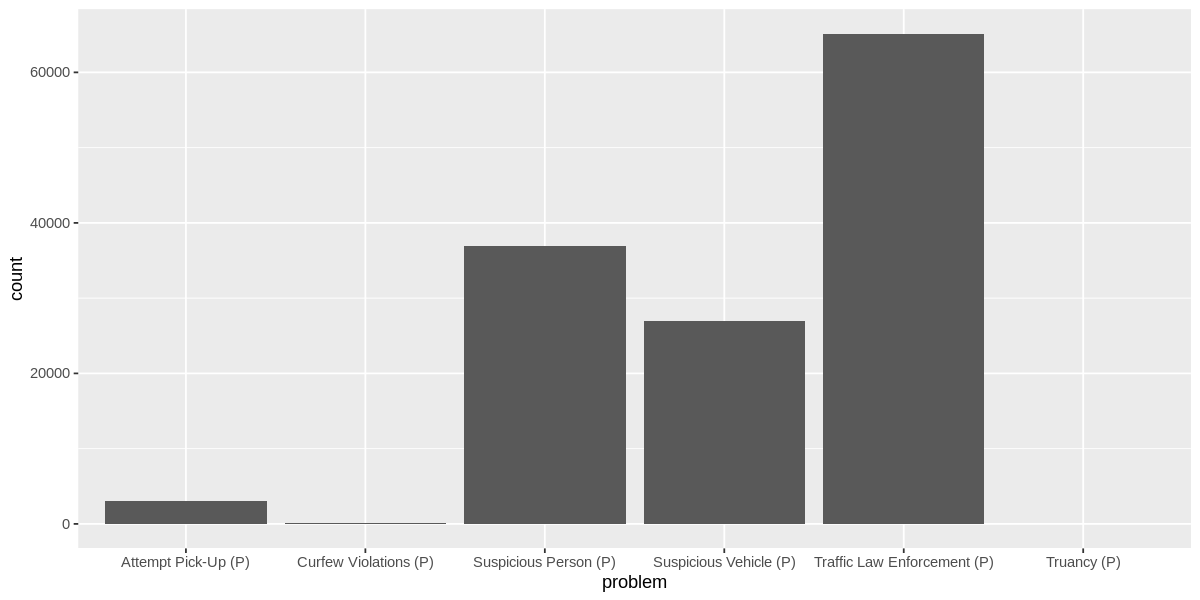

In [8]:
ggplot(crimeData) +
    geom_bar(aes(problem))

In [9]:
sum(crimeData$personSearch == 'YES') / nrow(crimeData)

[1] 0.1095957

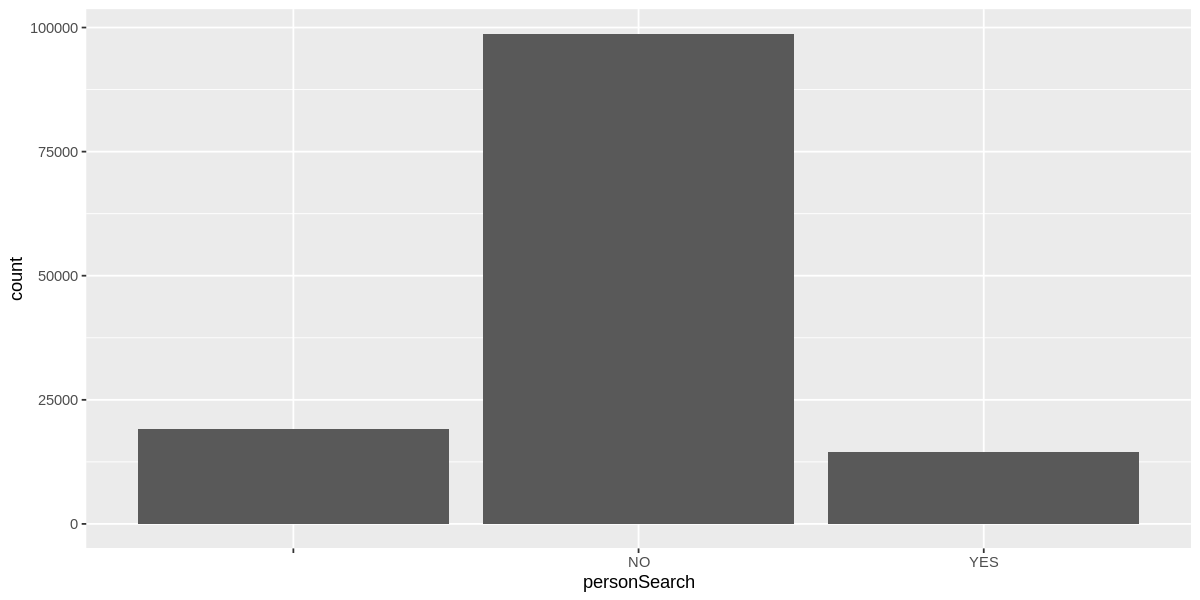

In [10]:
ggplot(crimeData) +
    geom_bar(aes(personSearch))